# DATA CLEANING

In [1]:
#Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#Importing my dataset
df=pd.read_excel(r'C:\Users\HP\Documents\PYTHON 101\PRACTICE\Road Accidents\Accidents in Africa.xlsx')

In [16]:
df

,Entity,Code,Year,Deaths,Sidedness,Historical_Population
0,Algeria,DZA,1990,13438,0,25758872
1,Algeria,DZA,1991,13120,0,26400468
2,Algeria,DZA,1992,13115,0,27028330
3,Algeria,DZA,1993,13154,0,27635517
4,Algeria,DZA,1994,13326,0,28213777
...,...,...,...,...,...,...
1615,Zimbabwe,ZWE,2015,2373,1,13814642
1616,Zimbabwe,ZWE,2016,2436,1,14030338
1617,Zimbabwe,ZWE,2017,2473,1,14236599
1618,Zimbabwe,ZWE,2018,2509,1,14438812


In [17]:
#Looking for NaN cells in the data
df.isna().sum()

Entity                   0
Code                     0
Year                     0
Deaths                   0
Sidedness                0
Historical_Population    0
dtype: int64

In [139]:
#Renaming columns

df.rename(columns={'Entity':'country','Sidedness':'side','Year':'year','Deaths':'deaths','Historical_Population':'hist_pop'
},inplace=True)

In [140]:
#Changing the numerical values of the rows to categorical
df['side'].mask(df['side']==0,'Right',inplace=True)

In [141]:
#Changing the numerical values of the rows to categorical
df['side'].mask(df['side']==1,'Left',inplace=True)

In [142]:
#Dropping unnecessary columns
df.drop(columns=['Code'],inplace=True)


In [143]:
#Confirming the above changes
df

,country,year,deaths,side,hist_pop
0,Algeria,1990,13438,Right,25758872
1,Algeria,1991,13120,Right,26400468
2,Algeria,1992,13115,Right,27028330
3,Algeria,1993,13154,Right,27635517
4,Algeria,1994,13326,Right,28213777
...,...,...,...,...,...
1615,Zimbabwe,2015,2373,Left,13814642
1616,Zimbabwe,2016,2436,Left,14030338
1617,Zimbabwe,2017,2473,Left,14236599
1618,Zimbabwe,2018,2509,Left,14438812


In [23]:
#List of countries in Africa
df.country.unique()
print(df.country.unique())
print('The Number of countries = ',len(df.country.unique()))

['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Comoros' 'Congo'
 "Cote d'Ivoire" 'Democratic Republic of Congo' 'Djibouti' 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia' 'Ghana'
 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia'
 'Niger' 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Saudi Arabia'
 'Senegal' 'Seychelles' 'Sierra Leone' 'Somalia' 'South Africa'
 'South Sudan' 'Sudan' 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia'
 'Zimbabwe']
The Number of countries =  54


In [144]:
#Removing country Saudi Arabia since it is not in Africa
SAU=df.groupby('country')['deaths'].get_group('Saudi Arabia') #drawing the dataframe
remove=list(SAU.index) #indexing the drawn dataframe
df.drop(index=remove,inplace=True) #dropping the range of rows
df.shape #confirming if the rows have been dropped

(1590, 5)

# DESCRIPTIVE ANALYSIS

In [25]:
#SORTING with countries population(descending order)
df.sort_values(by='hist_pop',ascending=False) #Nigeria has the largest population, Seychelles smalllest

,country,year,deaths,side,hist_pop
1139,Nigeria,2019,18508,Right,200963603
1138,Nigeria,2018,18531,Right,195874685
1137,Nigeria,2017,19319,Right,190873247
1136,Nigeria,2016,19370,Right,185960244
1135,Nigeria,2015,19053,Right,181137454
...,...,...,...,...,...
1264,Seychelles,1994,11,Left,75444
1263,Seychelles,1993,10,Left,74071
1262,Seychelles,1992,9,Left,72661
1261,Seychelles,1991,9,Left,71446


In [26]:
#SORTING with number of deaths per year
df.sort_values(by='deaths',ascending=False) #DRC recorded highest number of deaths by accidents, Seychelles lowest

#why did DRC record the highest number of deaths?

,country,year,deaths,side,hist_pop
415,Democratic Republic of Congo,2015,30061,Right,76244532
418,Democratic Republic of Congo,2018,29778,Right,84068092
416,Democratic Republic of Congo,2016,29640,Right,78789130
419,Democratic Republic of Congo,2019,29543,Right,86790568
479,Egypt,2019,29490,Right,100388076
...,...,...,...,...,...
1264,Seychelles,1994,11,Left,75444
1263,Seychelles,1993,10,Left,74071
1262,Seychelles,1992,9,Left,72661
1261,Seychelles,1991,9,Left,71446


In [145]:
#% of deaths in all countries
df['%_deaths']= (df['deaths']/df['hist_pop'])*100
df

,country,year,deaths,side,hist_pop,%_deaths
0,Algeria,1990,13438,Right,25758872,0.052168
1,Algeria,1991,13120,Right,26400468,0.049696
2,Algeria,1992,13115,Right,27028330,0.048523
3,Algeria,1993,13154,Right,27635517,0.047598
4,Algeria,1994,13326,Right,28213777,0.047232
...,...,...,...,...,...,...
1615,Zimbabwe,2015,2373,Left,13814642,0.017177
1616,Zimbabwe,2016,2436,Left,14030338,0.017362
1617,Zimbabwe,2017,2473,Left,14236599,0.017371
1618,Zimbabwe,2018,2509,Left,14438812,0.017377


In [52]:
#Dropping the populations since we dont need them
df.drop(columns=['hist_pop'],inplace=True)

In [148]:
#SORTING total percentage of deaths per year
df.groupby('year')['%_deaths'].mean().sort_values(ascending=False) #1990 had the highest rate of deaths

#Why is the rate of death decreasing thro the years?

year
1990    0.025651
1992    0.025454
1991    0.025436
1995    0.025387
1994    0.025345
1993    0.025323
1996    0.025299
1997    0.025246
1998    0.025156
1999    0.025063
2000    0.024874
2001    0.024522
2002    0.024387
2003    0.024191
2004    0.024060
2005    0.023753
2006    0.023465
2007    0.023276
2008    0.022905
2009    0.022555
2010    0.022218
2011    0.021881
2012    0.021523
2013    0.021209
2014    0.021044
2015    0.020774
2016    0.020489
2017    0.020252
2018    0.019985
2019    0.019699
Name: %_deaths, dtype: float64

In [54]:
#SORTING the percentage of deaths per year of a particular country
Country=input('Enter Country name: ')
mycountry=df.groupby('country')[['year','%_deaths']].get_group(Country)
mycountry.groupby('year')['%_deaths'].max().sort_values(ascending=False) #for example Kenya had the highest rate in 2007

#Why did Kenya record the highest death rate in 2007?

Enter Country name: Kenya


year
2007    0.010006
2011    0.009993
2008    0.009989
2010    0.009950
2006    0.009937
2009    0.009924
2005    0.009900
2012    0.009812
2004    0.009752
2013    0.009580
2003    0.009522
2014    0.009377
2002    0.009075
2015    0.009021
2016    0.008854
2017    0.008787
2018    0.008758
2019    0.008740
2001    0.008710
2000    0.008544
1990    0.008295
1999    0.008264
1991    0.008246
1992    0.008217
1998    0.008215
1993    0.008142
1997    0.008084
1994    0.008081
1995    0.008034
1996    0.008017
Name: %_deaths, dtype: float64

In [30]:
#Saving a new excel workbook with the added column
df.to_excel('New_Accidents.xlsx')

In [55]:
#SORTING with % in deaths 
df.nlargest(1500,columns='%_deaths') #CAR had the highest percentage in deaths,Cape Verde lowest 

#Why did CAR record the highest rate of death? 

,country,year,deaths,side,%_deaths
261,Central African Republic,2011,3029,Right,0.068551
260,Central African Republic,2010,2973,Right,0.067772
263,Central African Republic,2013,3001,Right,0.067469
262,Central African Republic,2012,2985,Right,0.067284
264,Central African Republic,2014,2957,Right,0.066239
...,...,...,...,...,...
1402,South Sudan,2012,1034,Right,0.010224
1194,Sao Tome and Principe,2014,20,Right,0.010218
809,Liberia,2019,503,Right,0.010188
1185,Sao Tome and Principe,2005,16,Right,0.010161


In [31]:
#Total number of countries using a particular side of the road
print('Right side population = ',df.groupby('side')['country'].get_group('Right').count()//30)
print('Left side population = ',df.groupby('side')['country'].get_group('Left').count()//30)

#Why are most of the countries using the right side of the road?

Right side population =  40
Left side population =  13


In [32]:
#Total deaths per side of the road
print('Right side deaths = ',df.groupby('side')['deaths'].get_group('Right').sum())
print('Left side deaths = ',df.groupby('side')['deaths'].get_group('Left').sum())

#This is because most of the countries use the right side of the road

Right side deaths =  4981608
Left side deaths =  1367006


In [139]:
#Max, Min and Total deaths by accident recorded per country
Country=input('Enter Country name: ')
print('Maximum deaths recorded was',df.groupby('country')['deaths'].get_group(Country).max(),'in',Country)
print('Minimum deaths recorded was',df.groupby('country')['deaths'].get_group(Country).min(),'in',Country)
print('Total deaths recorded was',df.groupby('country')['deaths'].get_group(Country).sum(),'in',Country)

Enter Country name: Kenya
Maximum deaths recorded was 4595 in Kenya
Minimum deaths recorded was 1968 in Kenya
Total deaths recorded was 100798 in Kenya


In [21]:
#Deaths per Country in particular year
Country=input('Enter Country name: ')
Year=eval(input('Enter Year: '))
mycountry=df.groupby('country')[['year','deaths']].get_group(Country)
print('Deaths in ',Year,'was',mycountry.groupby('year')['deaths'].get_group(Year).sum())

Enter Country name: Kenya
Enter Year: 2008
Deaths in  2008 was 3975


In [63]:
#Highest Deaths recorded per Country and the year
Country=input('Enter Country name: ')
mycountry=df.groupby('country')[['year','deaths']].get_group(Country)
mx=mycountry['deaths'].max()
my=df.groupby('deaths')['year'].get_group(mx)
print(mx,my.values)

#Why was the number of deaths in Kenya highest in 2019?

Enter Country name: Kenya
4595 [2019]


In [64]:
#Highest Death rate recorded per Country and the year
Country=input('Enter Country name: ')
mycountry=df.groupby('country')[['year','%_deaths']].get_group(Country)
rmx=mycountry['%_deaths'].max()
rmy=df.groupby('%_deaths')['year'].get_group(rmx)
print(rmx,rmy.values)

#Why was the number of death rate in Kenya highest in 2007?

Enter Country name: Kenya
0.010006217651277967 [2007]


In [65]:
#Lowest Deaths recorded per Country and the year
Country=input('Enter Country name: ')
mycountry=df.groupby('country')[['year','deaths']].get_group(Country)
mx=mycountry['deaths'].min()
my=df.groupby('deaths')['year'].get_group(mx)
print(mx,my.values)

#Why was the number of deaths in Kenya lowest in 1990?

Enter Country name: Kenya
1968 [1990]


In [68]:
#Lowest Death rate recorded per Country and the year
Country=input('Enter Country name: ')
mycountry=df.groupby('country')[['year','%_deaths']].get_group(Country)
rmx=mycountry['%_deaths'].min()
rmy=df.groupby('%_deaths')['year'].get_group(rmx)
print(rmx,rmy.values)

#Why was the number of death rate in Kenya lowest in 1996?

Enter Country name: Kenya
0.008016941630508813 [1996]


In [260]:
#What side of the road a country uses
Country=input('Enter Country name: ')
print(Country,'uses the',df.groupby('country')['side'].get_group(Country).max(), 'side of the road')

Enter Country name: Cape Verde
Cape Verde uses the Right side of the road


# DATA VISUALIZATION 

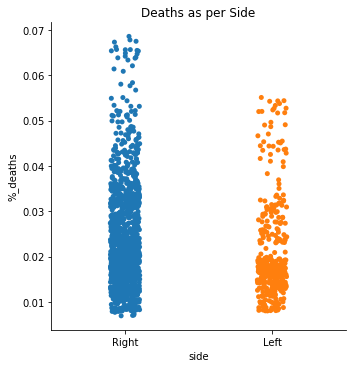

In [69]:
#Visualizing deaths per side of the road

sns.catplot(x="side", y="%_deaths", data=df)
plt.title('Deaths as per Side');

#This is probably because 75% of the countries use the right  side of the road

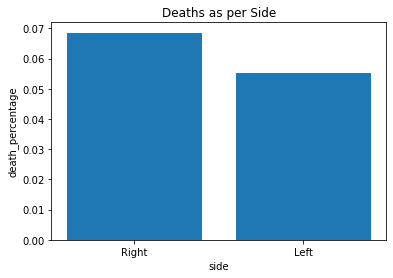

In [71]:
#plotting a bar chart
x=df.side
y=df['%_deaths']
plt.xlabel('side')# set axis labels
plt.ylabel('death_percentage') # set axis labels
plt.title('Deaths as per Side') # set title
plt.bar(x, y);

#This is probably because 75% of the countries use the right  side of the road

Enter Country name: Kenya


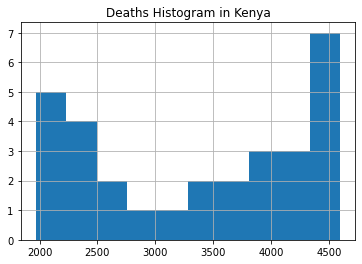

In [91]:
#Visualizing a histogram of deaths per country
Country=input('Enter Country name: ')
df.groupby('country')['deaths'].get_group(Country).hist();
plt.title('Deaths Histogram in '+Country);

#Most recorded deaths in Kenya were between 4250 and 4500 per year

Enter Country name: Kenya


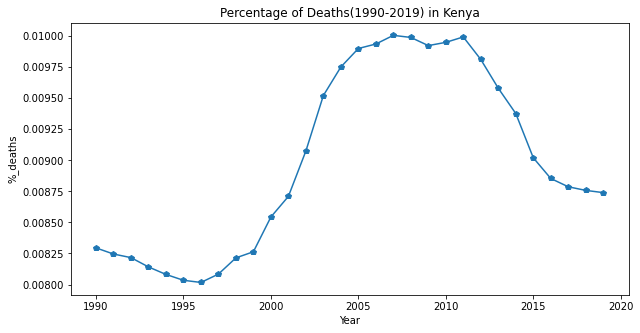

In [107]:
#A line graph for percentage of deaths thro' the years in aparticular country
Country=input('Enter Country name: ')
mycountry=df.groupby('country')[['year','%_deaths']].get_group(Country)
deaths_per_year=mycountry.groupby('year')['%_deaths'].mean() #drawing my dataframe
x=deaths_per_year.index.tolist()
y=deaths_per_year.values.tolist()
plt.figure(figsize=(10, 5)) #setting size of graph
plt.xlabel('Year') #labelling
plt.ylabel('%_deaths') #labelling
plt.title('Percentage of Deaths(1990-2019) in '+Country) #Title
plt.plot(x,y, marker='p');

#Why this trend?

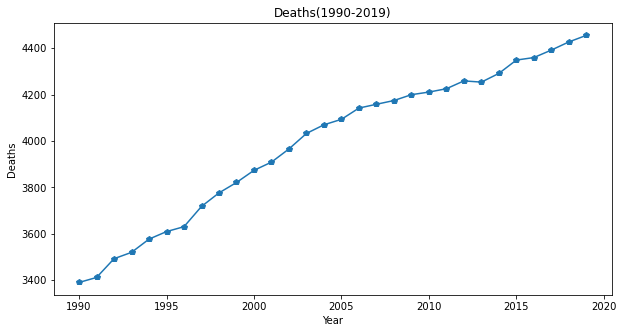

In [147]:
#A line graph for deaths thro' the years
deaths_per_year=df.groupby('year')['deaths'].mean() #drawing my dataframe
x=deaths_per_year.index.tolist()
y=deaths_per_year.values.tolist()
plt.figure(figsize=(10, 5)) #setting size of graph
plt.xlabel('Year') #labelling
plt.ylabel('Deaths') #labelling
plt.title('Deaths(1990-2019)') #Title
plt.plot(x,y,marker='p');

#Why did the number of deaths reduce over the years?
#This could be explained by the increase in population over the years for eg in Kenya where population grew from 23m-52million 

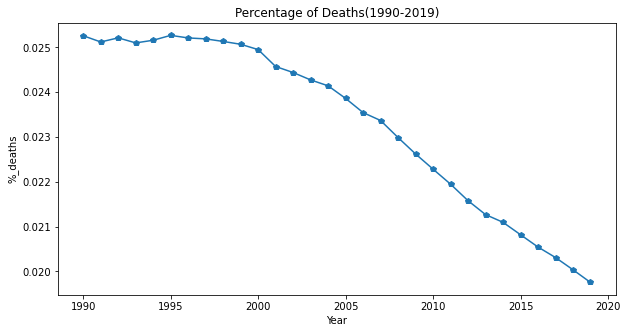

In [247]:
#A line graph for percentage of deaths thro' the years
deaths_per_year=df.groupby('year')['%_deaths'].mean() #drawing my dataframe
x=deaths_per_year.index.tolist()
y=deaths_per_year.values.tolist()
plt.figure(figsize=(10, 5)) #setting size of graph
plt.xlabel('Year') #labelling
plt.ylabel('%_deaths') #labelling
plt.title('Percentage of Deaths(1990-2019)') #Title
plt.plot(x,y, marker='p');

#Why did the percentage of death reduce over the years?

Enter Country name: Kenya


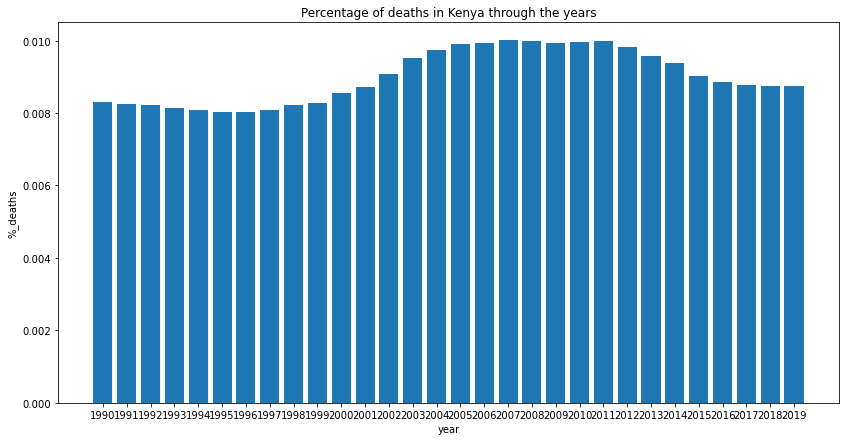

In [108]:
#Barplots for percentage of deaths per country through the years
Country=input('Enter Country name: ') 
mycountry=df.groupby('country')[['year','%_deaths']].get_group(Country)
yrs=df.year.unique()
x=mycountry.year
y=mycountry['%_deaths']
plt.figure(figsize=(14,7))
plt.xlabel('year')
plt.ylabel('%_deaths')
plt.xticks(yrs)
plt.title('Percentage of deaths in '+Country+' through the years')
plt.bar(x,y);

#Why this trend?

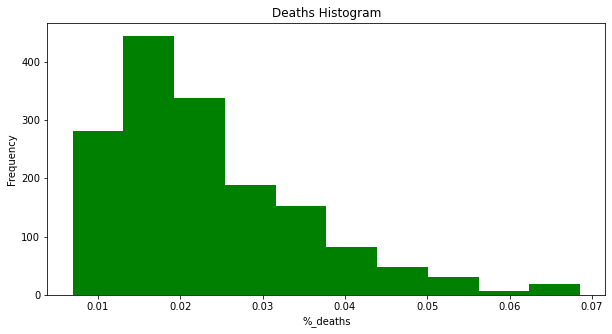

In [83]:
#Histogram of death percentages
plt.figure(figsize=(10,5))
plt.title('Deaths Histogram')
plt.xlabel('%_deaths')
plt.ylabel('Frequency')
plt.hist(df['%_deaths'], bins=10, color='green');

#The death rates in many countries are between 0.015-0.02
#Least recorded death rate is 0.06

Enter Country name: Kenya


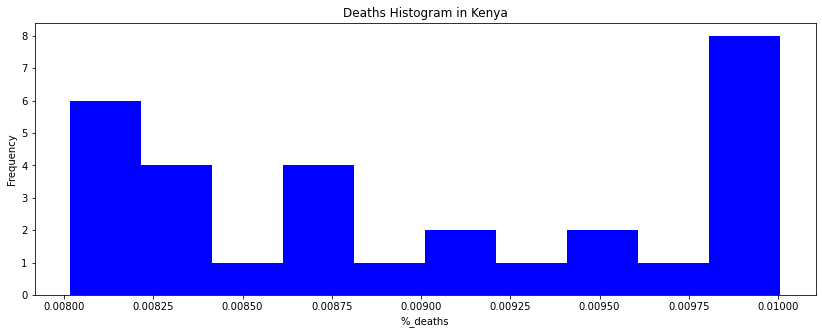

In [97]:
Country=input('Enter Country name: ')
mycountry=df.groupby('country')['%_deaths'].get_group(Country)
plt.figure(figsize=(14,5))
plt.title('Deaths Histogram in '+Country)
plt.xlabel('%_deaths')
plt.ylabel('Frequency')
plt.hist(mycountry, bins=10, color='blue');

#The highest recorded death rate in Kenya was 0.0100 which was in 2007
#Why was it in 2007?

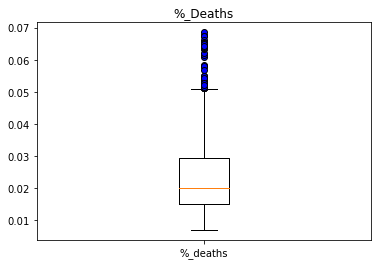

In [94]:
data = df[['%_deaths']]

# create outlier point shape
outlier = dict(markerfacecolor='b')

# set title
plt.title('%_Deaths')

# make the boxplot
plt.boxplot(data.values, labels=['%_deaths'],flierprops=outlier);#The data has  outliers

# BUILDING THE DATABASE

In [110]:
#setting up connection with my sql

import psycopg2 as psy
conn=psy.connect("dbname='postgres' user='postgres' host='localhost' password='admin'")
cur=conn.cursor()

In [112]:
#Creating table Road_Accidents_Africa

cur.execute('''create table Road_Accidents_Africa(
Country varchar(30),
Year smallint,
Deaths smallint,
Side varchar(6),
Death_Rate double precision
)''')

In [115]:
#Populating my table Road_Accidents_Africa

code='''
INSERT INTO Road_Accidents_Africa(Country,Year,Deaths,Side,Death_Rate) 
VALUES(%s,%s,%s,%s,%s)
'''


def inserting_to_Road_Accidents_Africa(s):
    Country=s.country
    Year=s.year
    Deaths=s.deaths
    Side=s.side
    Death_Rate=s['%_deaths']
    cols=(Country,Year,Deaths,Side,Death_Rate)
    
    cur.execute(code,cols)
    
for row_no,row in df.iterrows():
    inserting_to_Road_Accidents_Africa(row)

In [116]:
#Fetching the first 5 rows of my table

cur.execute('''select * from Road_Accidents_Africa 
''')
cur.fetchmany(5)

[('Algeria', 1990, 13438, 'Right', 0.05216843346245907),
 ('Algeria', 1991, 13120, 'Right', 0.04969608872085146),
 ('Algeria', 1992, 13115, 'Right', 0.04852316069842273),
 ('Algeria', 1993, 13154, 'Right', 0.04759816868995069),
 ('Algeria', 1994, 13326, 'Right', 0.04723224402035927)]

In [126]:
#Deaths in Kenya for the year 2007

cur.execute('''select * from Road_Accidents_Africa where Country='Kenya' and Year=2007
''')
ky=cur.fetchall()
ky[0][2]

3873

In [128]:
#Data for Kenya 1990-1999
cur.execute('''select * from Road_Accidents_Africa where Country='Kenya' 
''')
cur.fetchmany(10)

[('Kenya', 1990, 1968, 'Left', 0.008295196364748214),
 ('Kenya', 1991, 2022, 'Left', 0.008245753131286011),
 ('Kenya', 1992, 2081, 'Left', 0.008216826291317094),
 ('Kenya', 1993, 2128, 'Left', 0.008141958723406681),
 ('Kenya', 1994, 2178, 'Left', 0.008081480319406224),
 ('Kenya', 1995, 2231, 'Left', 0.008034342185262567),
 ('Kenya', 1996, 2292, 'Left', 0.008016941630508813),
 ('Kenya', 1997, 2378, 'Left', 0.008084129337910487),
 ('Kenya', 1998, 2485, 'Left', 0.0082147435109146),
 ('Kenya', 1999, 2570, 'Left', 0.008263994294564063)]